<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [ ]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [ ]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [ ]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


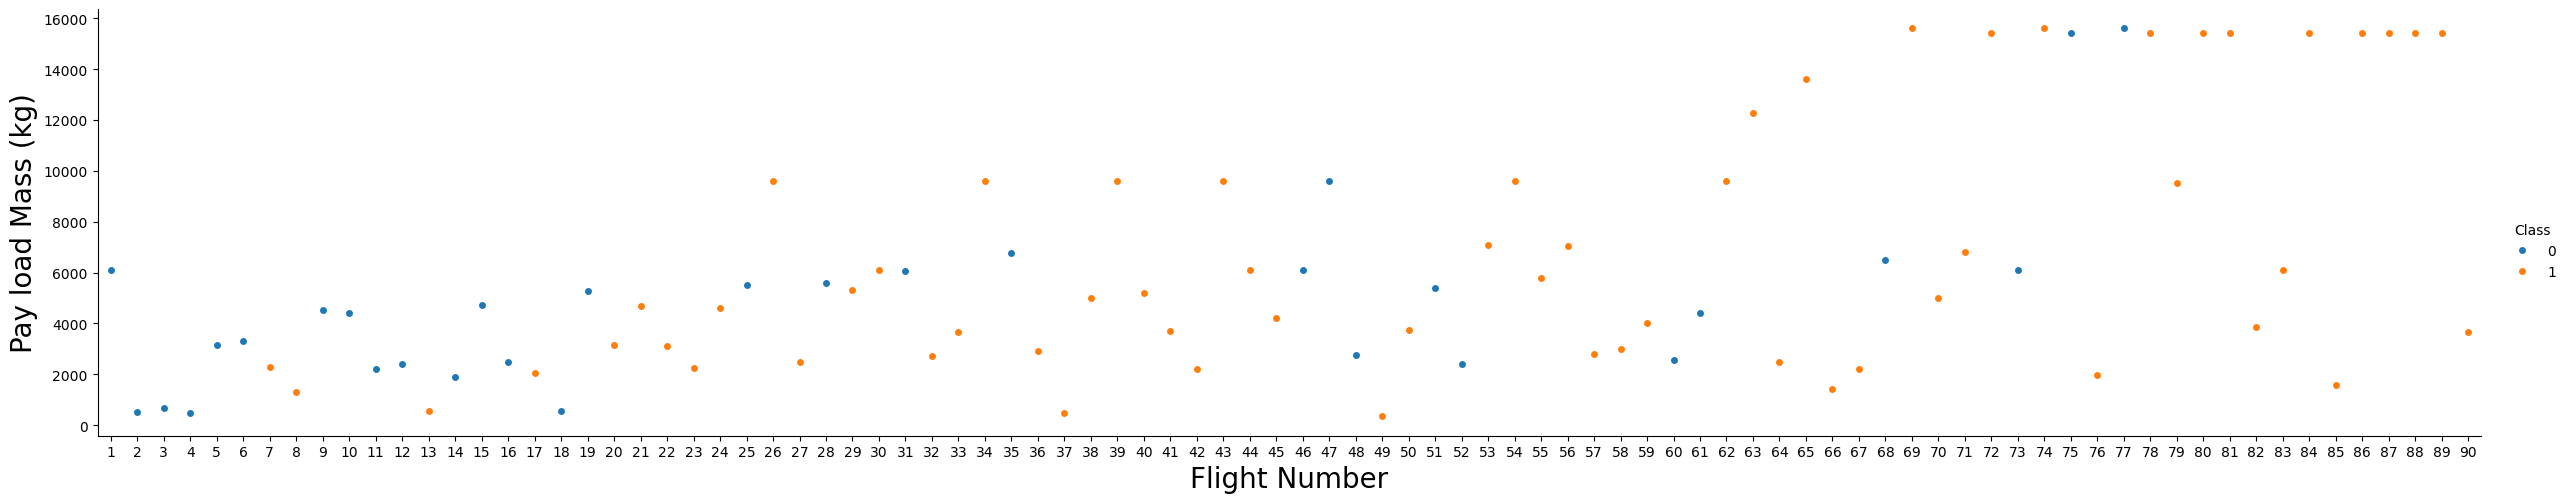

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False  

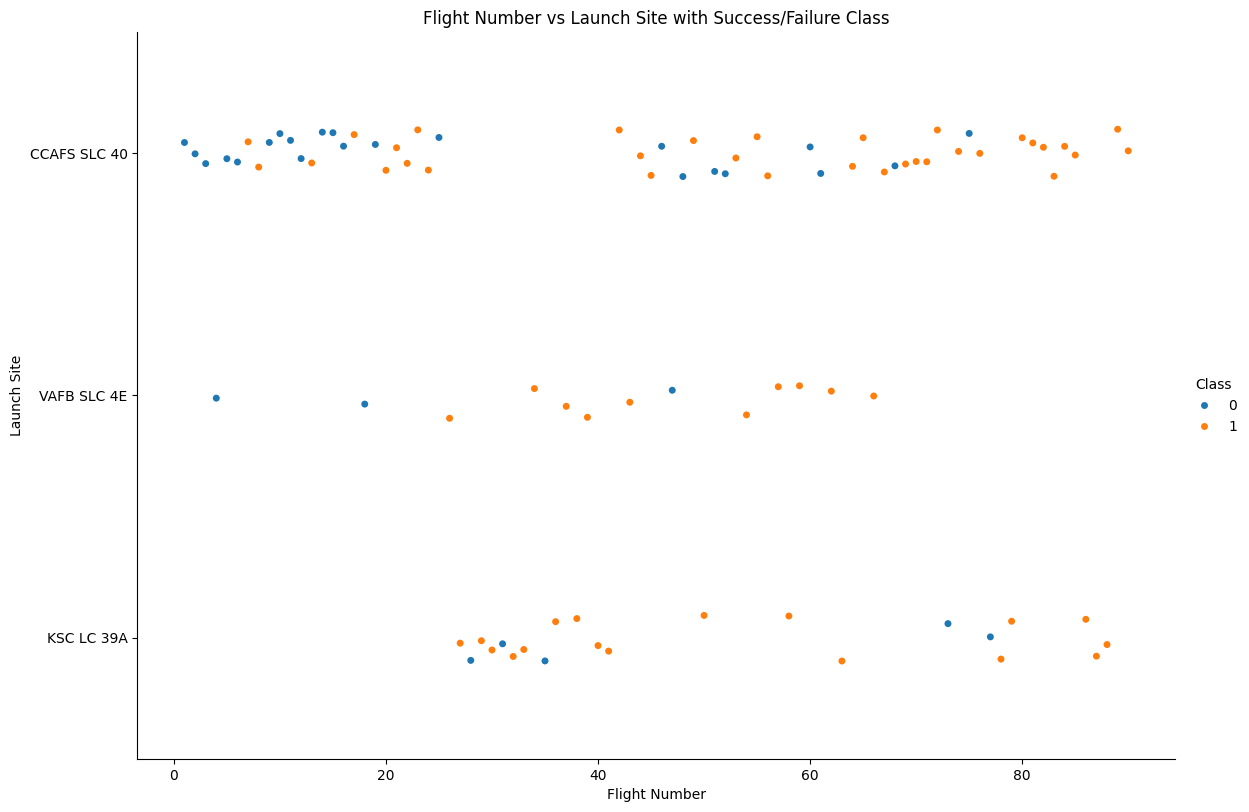

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Inspect the columns
print(df.columns)

# Print the first few rows to understand the data
print(df.head())

# Create a categorical plot using Seaborn with the correct column names
# Adjust the column names based on the inspection
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, kind='strip', height=8, aspect=1.5)

# Customize labels and title
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight Number vs Launch Site with Success/Failure Class')

# Show the plot
plt.show()

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')


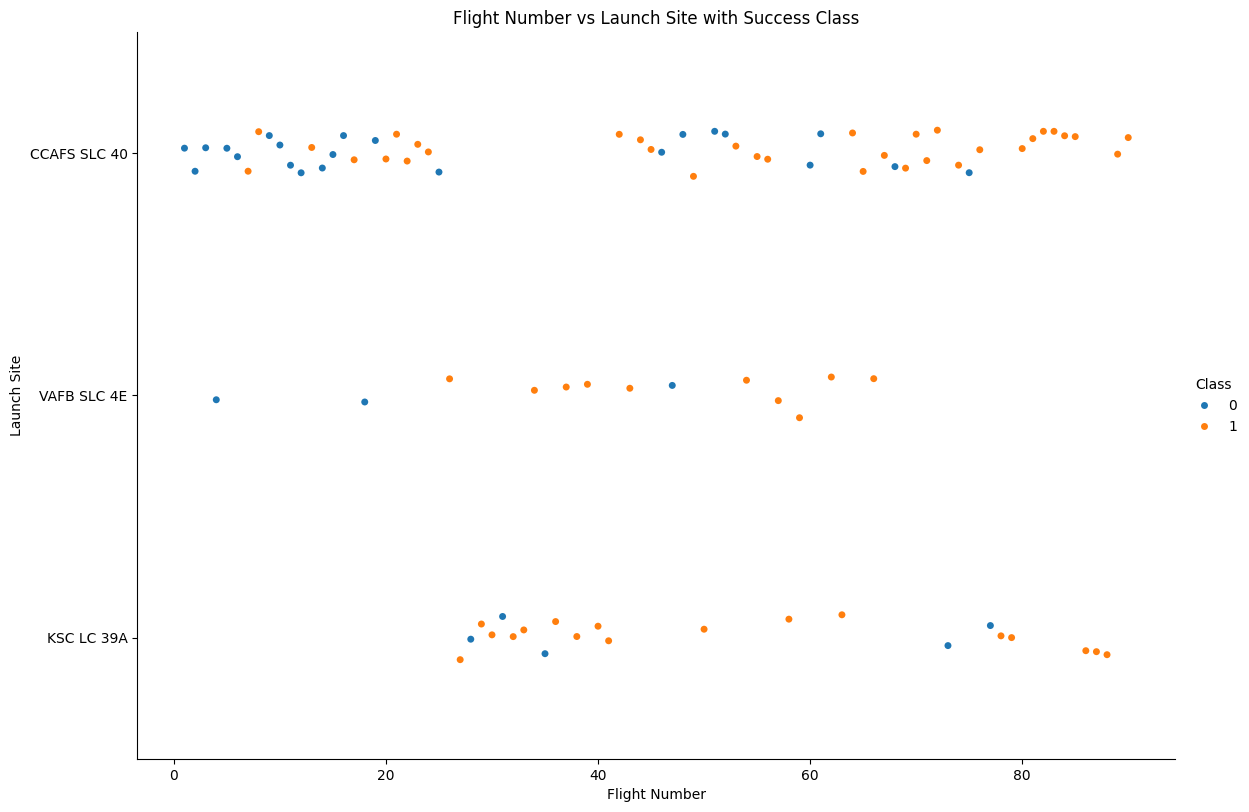

In [ ]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
import pandas as pd

# Load the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Display the first few rows of the dataframe to inspect the column names
print(df.columns)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a categorical plot using Seaborn
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, kind='strip', height=8, aspect=1.5)

# Customize labels and title
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight Number vs Launch Site with Success Class')

# Show the plot
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


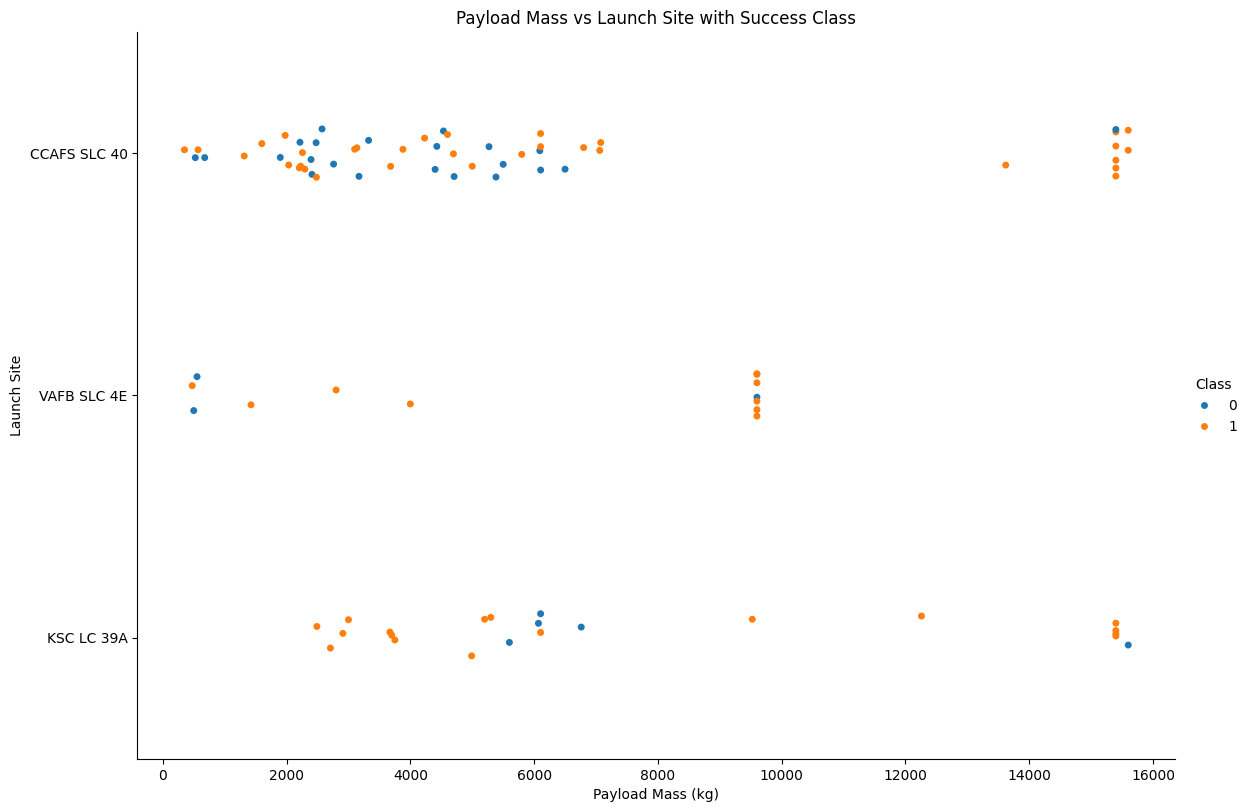

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a categorical plot using Seaborn
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, kind='strip', height=8, aspect=1.5)

# Customize labels and title
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.title('Payload Mass vs Launch Site with Success Class')

# Show the plot
plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.


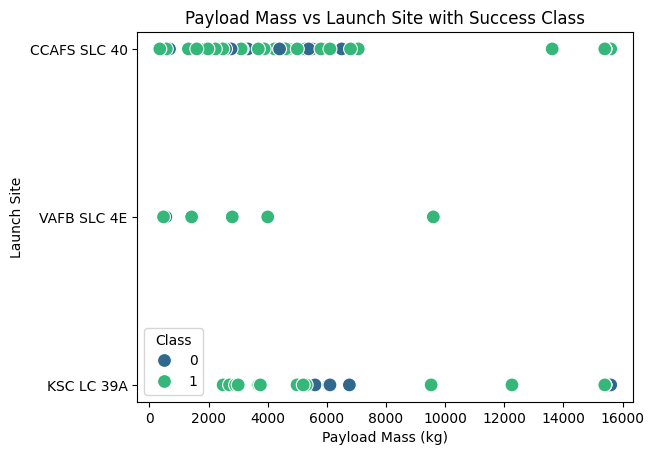

In [ ]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot using Seaborn
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, palette='viridis', s=100)

# Customize labels and title
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.title('Payload Mass vs Launch Site with Success Class')

# Show the plot
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


<ipython-input-8-90c50f1e06b5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='SuccessRate', data=success_rate, palette='viridis')


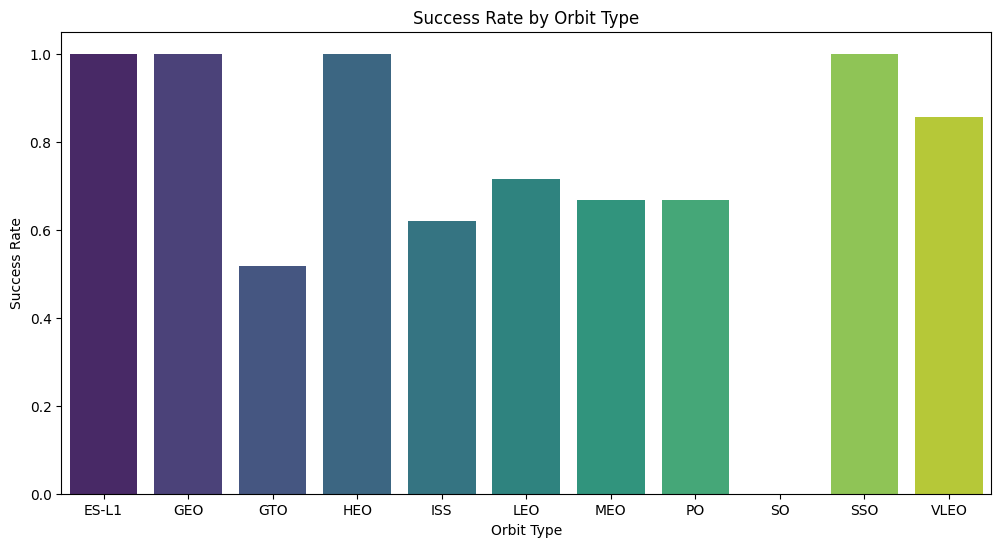

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Calculate the success rate for each orbit type
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
success_rate.columns = ['Orbit', 'SuccessRate']

# Plot the success rate using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Orbit', y='SuccessRate', data=success_rate, palette='viridis')

# Customize labels and title
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate by Orbit Type')

# Show the plot
plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


<ipython-input-9-efda97d509d8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='SuccessRate', data=success_rate, palette='viridis')


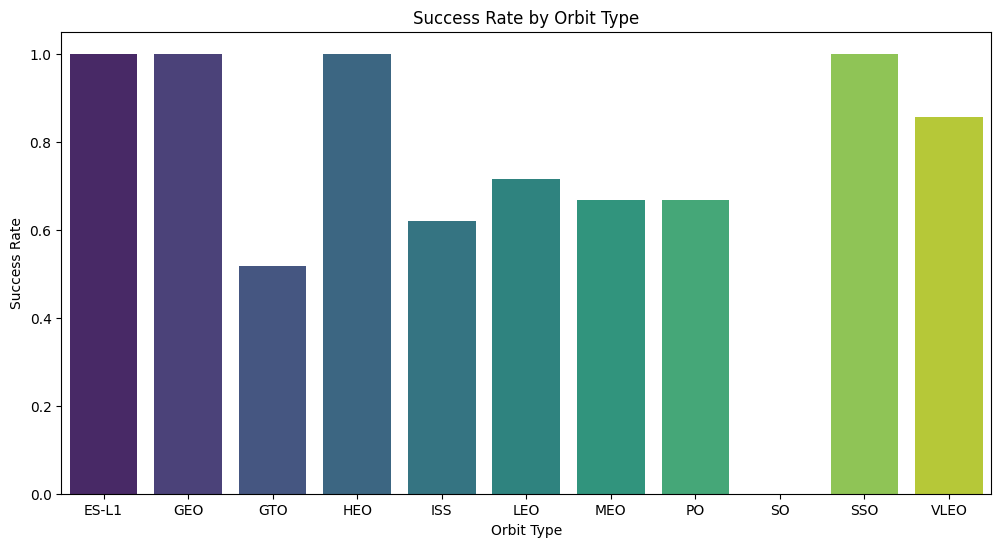

In [ ]:
# HINT use groupby method on Orbit column and get the mean of Class column
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Calculate the success rate for each orbit type
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
success_rate.columns = ['Orbit', 'SuccessRate']

# Plot the success rate using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Orbit', y='SuccessRate', data=success_rate, palette='viridis')

# Customize labels and title
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate by Orbit Type')

# Show the plot
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


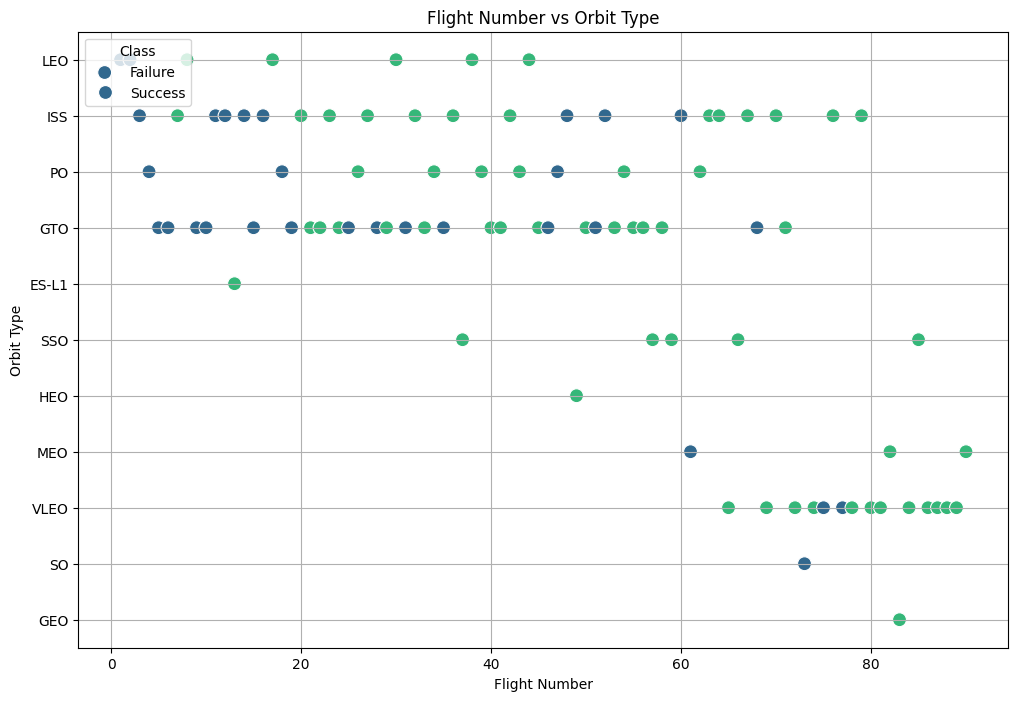

In [ ]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Plot a scatter plot with FlightNumber vs Orbit
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='viridis', marker='o', s=100)

# Customize labels and title
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.title('Flight Number vs Orbit Type')

# Show plot
plt.legend(title='Class', loc='upper left', labels=['Failure', 'Success'])
plt.grid(True)
plt.show()


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


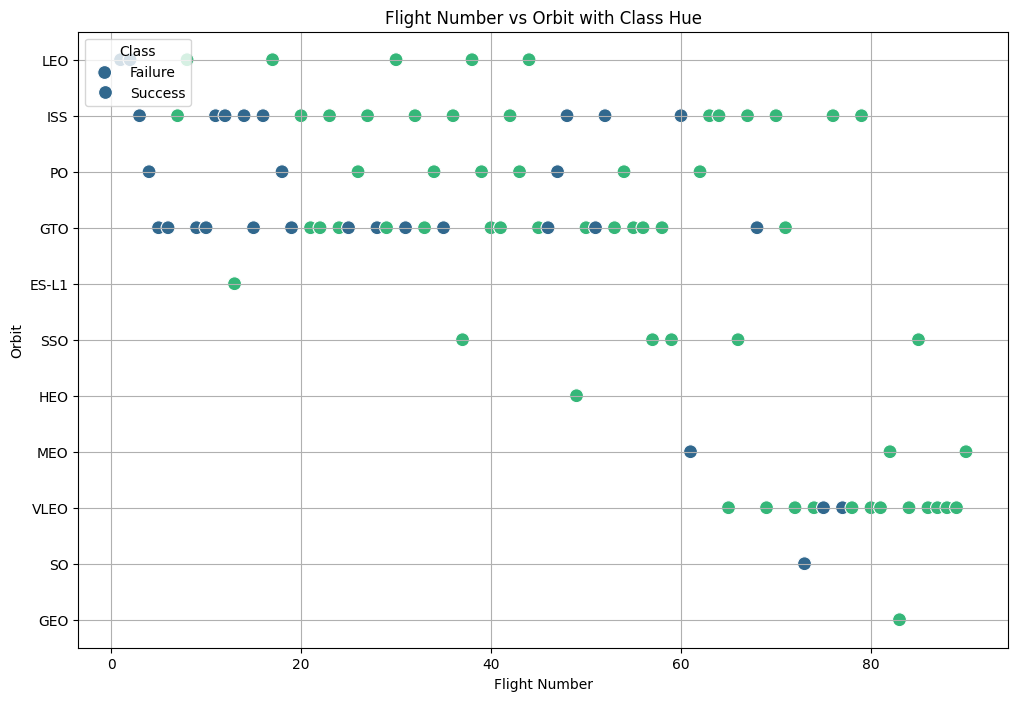

In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Plot scatter plot with FlightNumber vs Orbit, hue by Class
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='viridis', marker='o', s=100)

# Customize labels and title
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.title('Flight Number vs Orbit with Class Hue')

# Show plot
plt.legend(title='Class', loc='upper left', labels=['Failure', 'Success'])
plt.grid(True)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


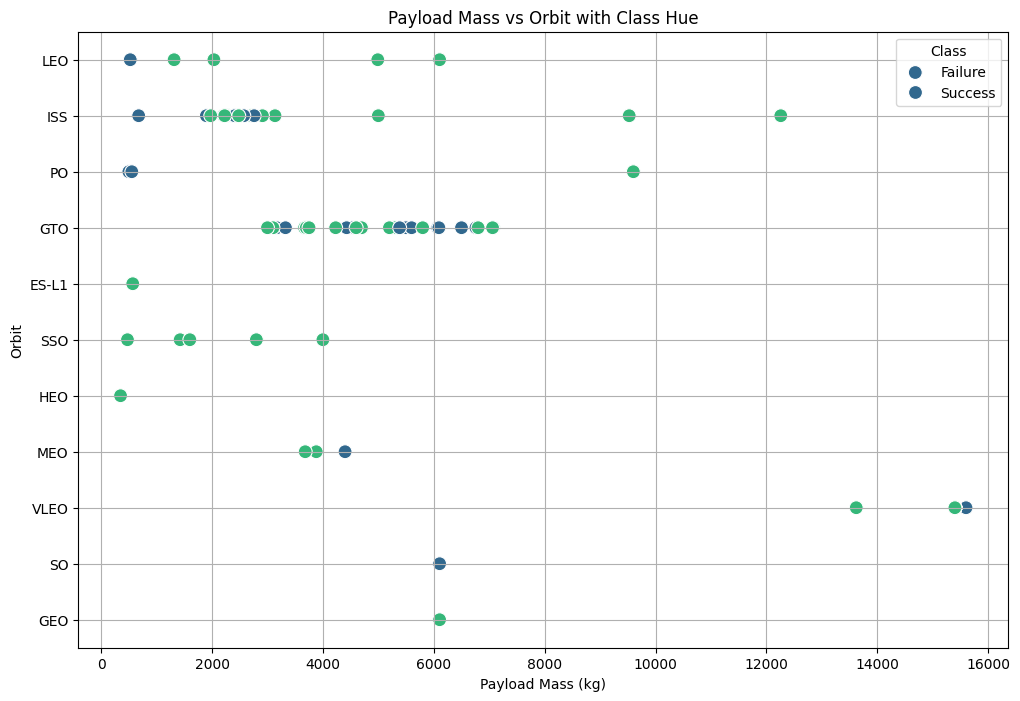

In [ ]:
### TASK  5: Visualize the relationship between Payload and Orbit type
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Plot scatter plot with PayloadMass vs Orbit, hue by Class
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='viridis', marker='o', s=100)

# Customize labels and title
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')
plt.title('Payload Mass vs Orbit with Class Hue')

# Show plot
plt.legend(title='Class', loc='upper right', labels=['Failure', 'Success'])
plt.grid(True)
plt.show()


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


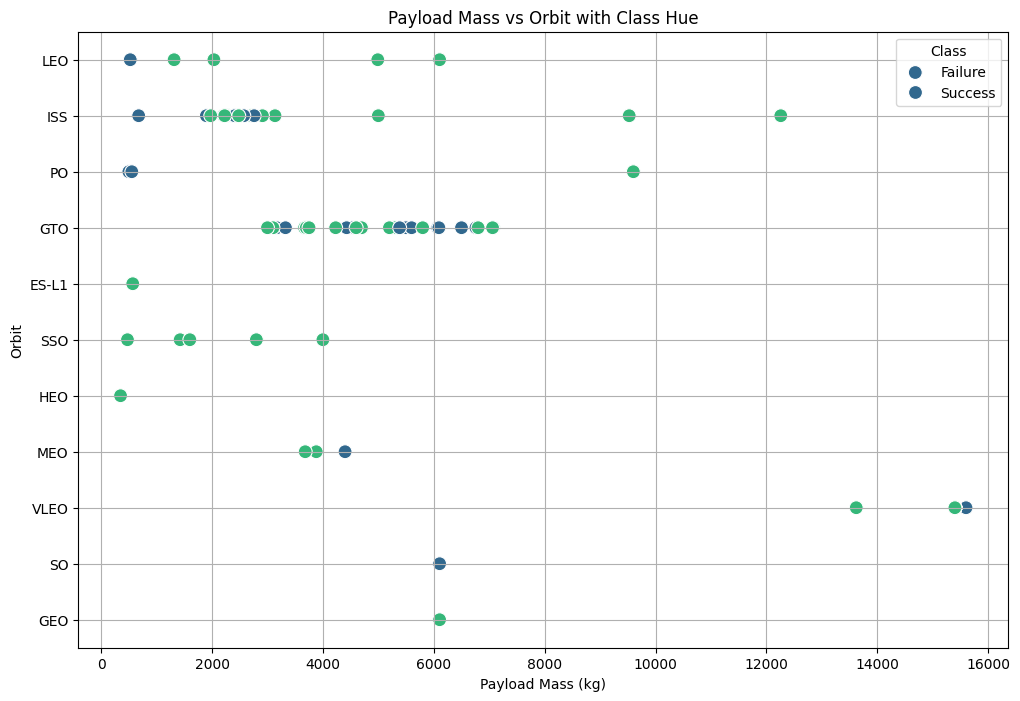

In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Plot scatter plot with Payload vs Orbit, hue by Class
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='viridis', marker='o', s=100)

# Customize labels and title
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')
plt.title('Payload Mass vs Orbit with Class Hue')

# Show plot
plt.legend(title='Class', loc='upper right', labels=['Failure', 'Success'])
plt.grid(True)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


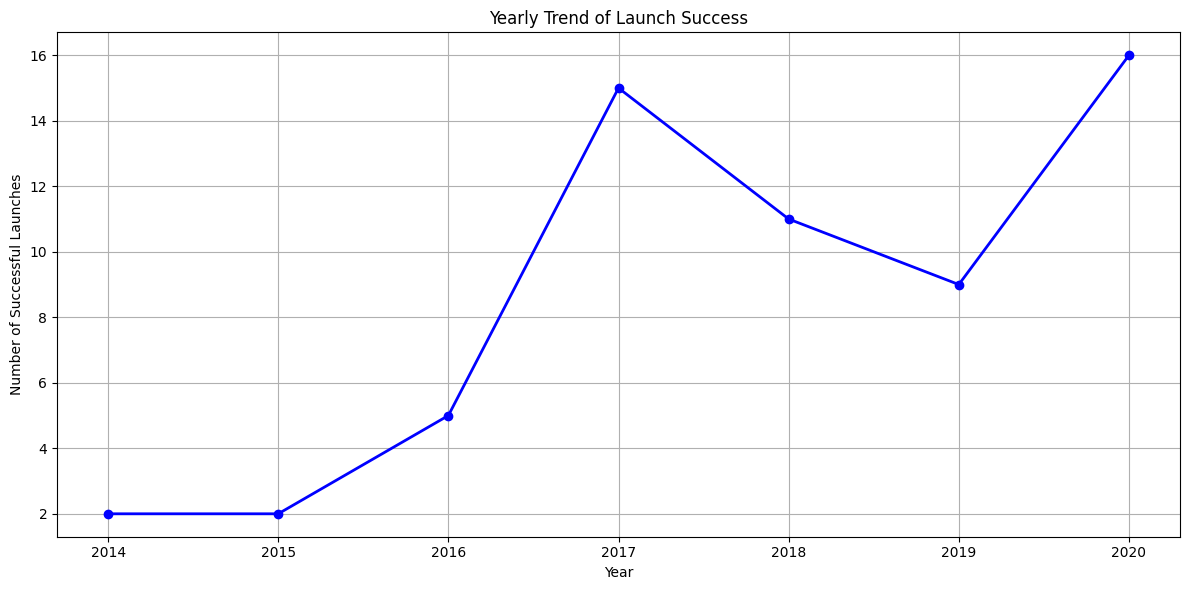

In [ ]:
### TASK  6: Visualize the launch success yearly trend
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from Date column
df['Year'] = df['Date'].dt.year

# Calculate launch success count per year
launches_per_year = df[df['Class'] == 1].groupby('Year').size()

# Plot the yearly trend of launch success
plt.figure(figsize=(12, 6))
launches_per_year.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)

# Customize labels and title
plt.title('Yearly Trend of Launch Success')
plt.xlabel('Year')
plt.ylabel('Number of Successful Launches')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
import pandas as pd

# Assuming df is already loaded and contains a 'Date' column of datetime type
df['Year'] = df['Date'].dt.year

# Print the first few rows to verify the new 'Year' column
print(df.head())

   FlightNumber       Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1 2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2 2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3 2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4 2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5 2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  Year  
0            0  B0003  -80.577366  28.561857      

Year
2010     0.000000
2012     0.000000
2013     0.000000
2014    33.333333
2015    33.333333
2016    62.500000
2017    83.333333
2018    61.111111
2019    90.000000
2020    84.210526
Name: Class, dtype: float64


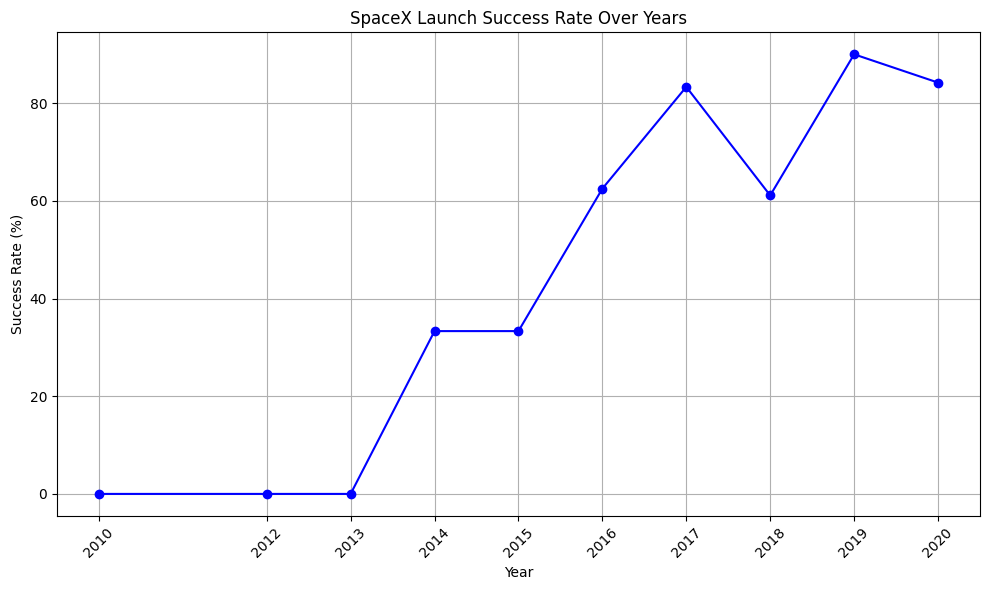

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
import pandas as pd

# Assuming df is your DataFrame with 'Year' and 'Class' columns

# Group by 'Year' and calculate the mean of 'Class' (1 for success, 0 for failure)
success_rate = df.groupby('Year')['Class'].mean() * 100  # Convert to percentage

# Print to verify
print(success_rate)

import matplotlib.pyplot as plt

# Plotting with Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(success_rate.index, success_rate.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Success Rate (%)')
plt.title('SpaceX Launch Success Rate Over Years')
plt.grid(True)
plt.xticks(success_rate.index, rotation=45)
plt.tight_layout()
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the relevant columns
# Example: df = pd.read_csv("your_dataset.csv")

# Encode categorical variables
encoder = LabelEncoder()
df['Orbit'] = encoder.fit_transform(df['Orbit'])
df['LaunchSite'] = encoder.fit_transform(df['LaunchSite'])
df['Outcome'] = encoder.fit_transform(df['Outcome'])

# Compute correlation matrix
correlation_matrix = df[['PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Year']].corr()

# Print correlation matrix
print(correlation_matrix)

             PayloadMass     Orbit  LaunchSite   Outcome      Year
PayloadMass     1.000000  0.620666    0.091554 -0.052851  0.565645
Orbit           0.620666  1.000000    0.325191  0.011630  0.454174
LaunchSite      0.091554  0.325191    1.000000  0.066105  0.093441
Outcome        -0.052851  0.011630    0.066105  1.000000  0.217284
Year            0.565645  0.454174    0.093441  0.217284  1.000000


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,5,0,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,5,0,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,4,0,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,7,2,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,2,0,1,False,False,False,NaN,1.0,0,B1004


In [ ]:
### TASK  7: Create dummy variables to categorical columns
import pandas as pd

# Assuming df is your DataFrame containing categorical columns
# Example: df = pd.read_csv("your_dataset.csv")

# Select categorical columns
categorical_columns = ['Orbit', 'LaunchSite', 'Outcome']

# Create dummy variables
dummy_df = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows to verify
dummy_df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Flights,GridFins,Reused,Legs,LandingPad,Block,...,LaunchSite_1,LaunchSite_2,Outcome_0,Outcome_1,Outcome_2,Outcome_3,Outcome_4,Outcome_5,Outcome_6,Outcome_7
0,1,2010-06-04,Falcon 9,6104.959412,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,True,False,False,False
1,2,2012-05-22,Falcon 9,525.000000,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,True,False,False,False
2,3,2013-03-01,Falcon 9,677.000000,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,True,False,False,False
3,4,2013-09-29,Falcon 9,500.000000,1,False,False,False,NaN,1.0,...,False,True,False,True,False,False,False,False,False,False
4,5,2013-12-03,Falcon 9,3170.000000,1,False,False,False,NaN,1.0,...,False,False,False,False,False,False,True,False,False,False


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns
import pandas as pd

# Assuming features is your DataFrame containing the relevant columns
# Example: features = pd.read_csv("your_dataset.csv")

# Columns to one-hot encode
columns_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply one-hot encoding
features_one_hot = pd.get_dummies(features, columns=columns_to_encode)

# Display the first few rows to verify
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_0,Orbit_1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
### TASK  8: Cast all numeric columns to `float64`
# Assuming features_one_hot is your DataFrame with numeric columns to be casted

# Identify numeric columns
numeric_columns = features_one_hot.select_dtypes(include=['int64', 'float64']).columns

# Cast numeric columns to float64
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

# Verify the data types
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056       bool
Serial_B1058       bool
Serial_B1059       bool
Serial_B1060       bool
Serial_B1062       bool
Length: 80, dtype: object


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function
# Cast the entire DataFrame to float64
features_one_hot = features_one_hot.astype('float64')

# Verify the data types
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
